<a href="https://colab.research.google.com/github/nicolegold/DSP_UNISINOS/blob/main/Trabalho2_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto GA DSP - Filtro Passa Baixas de Segunda Ordem Passivo

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Fs = 10000;  # taxa de amostragem
K = 1.0/Fs; # periodo de amostragem
t = np.arange(0,1,K) # vetor de tempo

In [2]:
#Valores dos componentes do circuito

L = 1 #H
C = 0.000001 #F
R = 1000 #Ohms

In [3]:
#Sinais de entrada

f = 100;   # frequencia do sinal
x1 = np.sin(2*np.pi*f*t + 0)
f = 500;
x2 = np.sin(2*np.pi*f*t + 0)
f = 1000;   # frequencia do sinal
x3 = np.sin(2*np.pi*f*t + 0)
f = 2000;
x4 = np.sin(2*np.pi*f*t + 0)
x = x1 + x2 + x3 + x4

In [4]:
a0 = 1
a1 = (2*(K*K) - 8*L*C) /(K*K + 4*L*C + 2*C*K*R)
a2 = (K*K - 2*C*K*R + 4*L*C) / (K*K + 4*L*C + 2*C*K*R)

b0 = K*K / (K*K + 4*L*C + 2*C*K*R)
b1 = 2*(K*K) / (K*K + 4*L*C + 2*C*K*R)
b2 = K*K / (K*K + 4*L*C + 2*C*K*R)

In [5]:
#Variaveis de estado
xh1=0;
xh2=0;

yh1=0;
yh2=0;

y = np.zeros(len(x));

In [6]:
#Variaveis de estado

xh1=0;
xh2=0;

yh1=0;
yh2=0;

y = np.zeros(len(x));

In [7]:
for n in range(0,len(x)):
    y[n]= b0*x[n] + b1*xh1 + b2*xh2 -a1*yh1 -a2*yh2;
    
    yh2=yh1;
    yh1=y[n];
    
    xh2=xh1;
    xh1=x[n];

In [8]:
n = len(y) # tamanho do sinal
k = np.arange(n) #vetor em k
T = n/Fs
frq = k/T # os dois lados do vetor de frequenCia
frq = frq[range(int(n/2))] # apenas um lado

In [9]:
Y = np.fft.fft(y)/n # Calculo da fft e normalização por n
Y = Y[range(int(n/2))]

In [10]:
X = np.fft.fft(x)/n # CalCulo da fft e normalização por n
X = X[range(int(n/2))]

Text(0, 0.5, 'Amplitude')

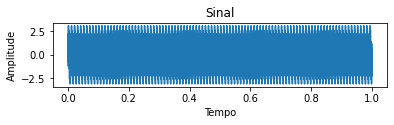

In [24]:
plt.subplot(3,1,1)
plt.plot(t,x)
plt.title('Sinal')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

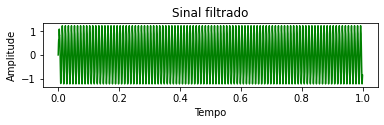

In [22]:
plt.subplot(3,1,2)
plt.plot(t,y,'g')
plt.title('Sinal filtrado')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

Text(0, 0.5, '|X(freq)|')

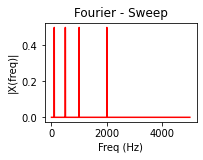

In [20]:
plt.subplot(2,2,3)
plt.plot(frq,abs(X),'r')
plt.title('Fourier - Sweep')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')

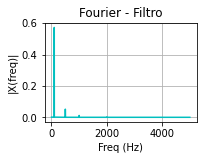

In [19]:
plt.subplot(2,2,4)
plt.plot(frq,abs(Y),'c')
plt.grid(True, which="both")
plt.title('Fourier - Filtro')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.show()